<a href="https://colab.research.google.com/github/ravihere9140/bank_loan_modelling/blob/main/Bank_loan_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE ESSENTIAL LIBRARIES..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

In [2]:
import zipfile
import pandas as pd

# Path to the zip file
zip_path = '/content/archive (2).zip'

# Open the zip file
with zipfile.ZipFile(zip_path) as z:
    # List all files inside the zip to find the correct one
    print(z.namelist())  # optional: to check exact file name

    # Read the Excel file from inside the zip
    with z.open('Bank_Personal_Loan_Modelling.xlsx') as f:
        data = pd.read_excel(f, sheet_name='Data')

# Rename columns as desired
data.columns = ["ID", "Age", "Experience", "Income", "ZIPCode", "Family",
                "CCAvg", "Education", "Mortgage", "PersonalLoan", "SecuritiesAccount",
                "CDAccount", "Online", "CreditCard"]


['Bank_Personal_Loan_Modelling.xlsx']


In [3]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

Information on the features or attributes¶
The attributes can be divided accordingly :

The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.
The binary category have five variables as below:

Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
Securities Account - Does the customer have a securities account with the bank?
CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
Online - Does the customer use internet banking facilities?
Credit Card - Does the customer use a credit card issued by UniversalBank?
Interval variables are as below:

Age - Age of the customer
Experience - Years of experience
Income - Annual income in dollars

In [5]:
data.shape

(5000, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
data.apply(lambda x : sum(x.isnull()))

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
PersonalLoan,0


In [8]:
# Eye balling the data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
data.apply(lambda x: len(x.unique()))

,0
ID,5000
Age,45
Experience,47
Income,162
ZIPCode,467
Family,4
CCAvg,108
Education,3
Mortgage,347
PersonalLoan,2


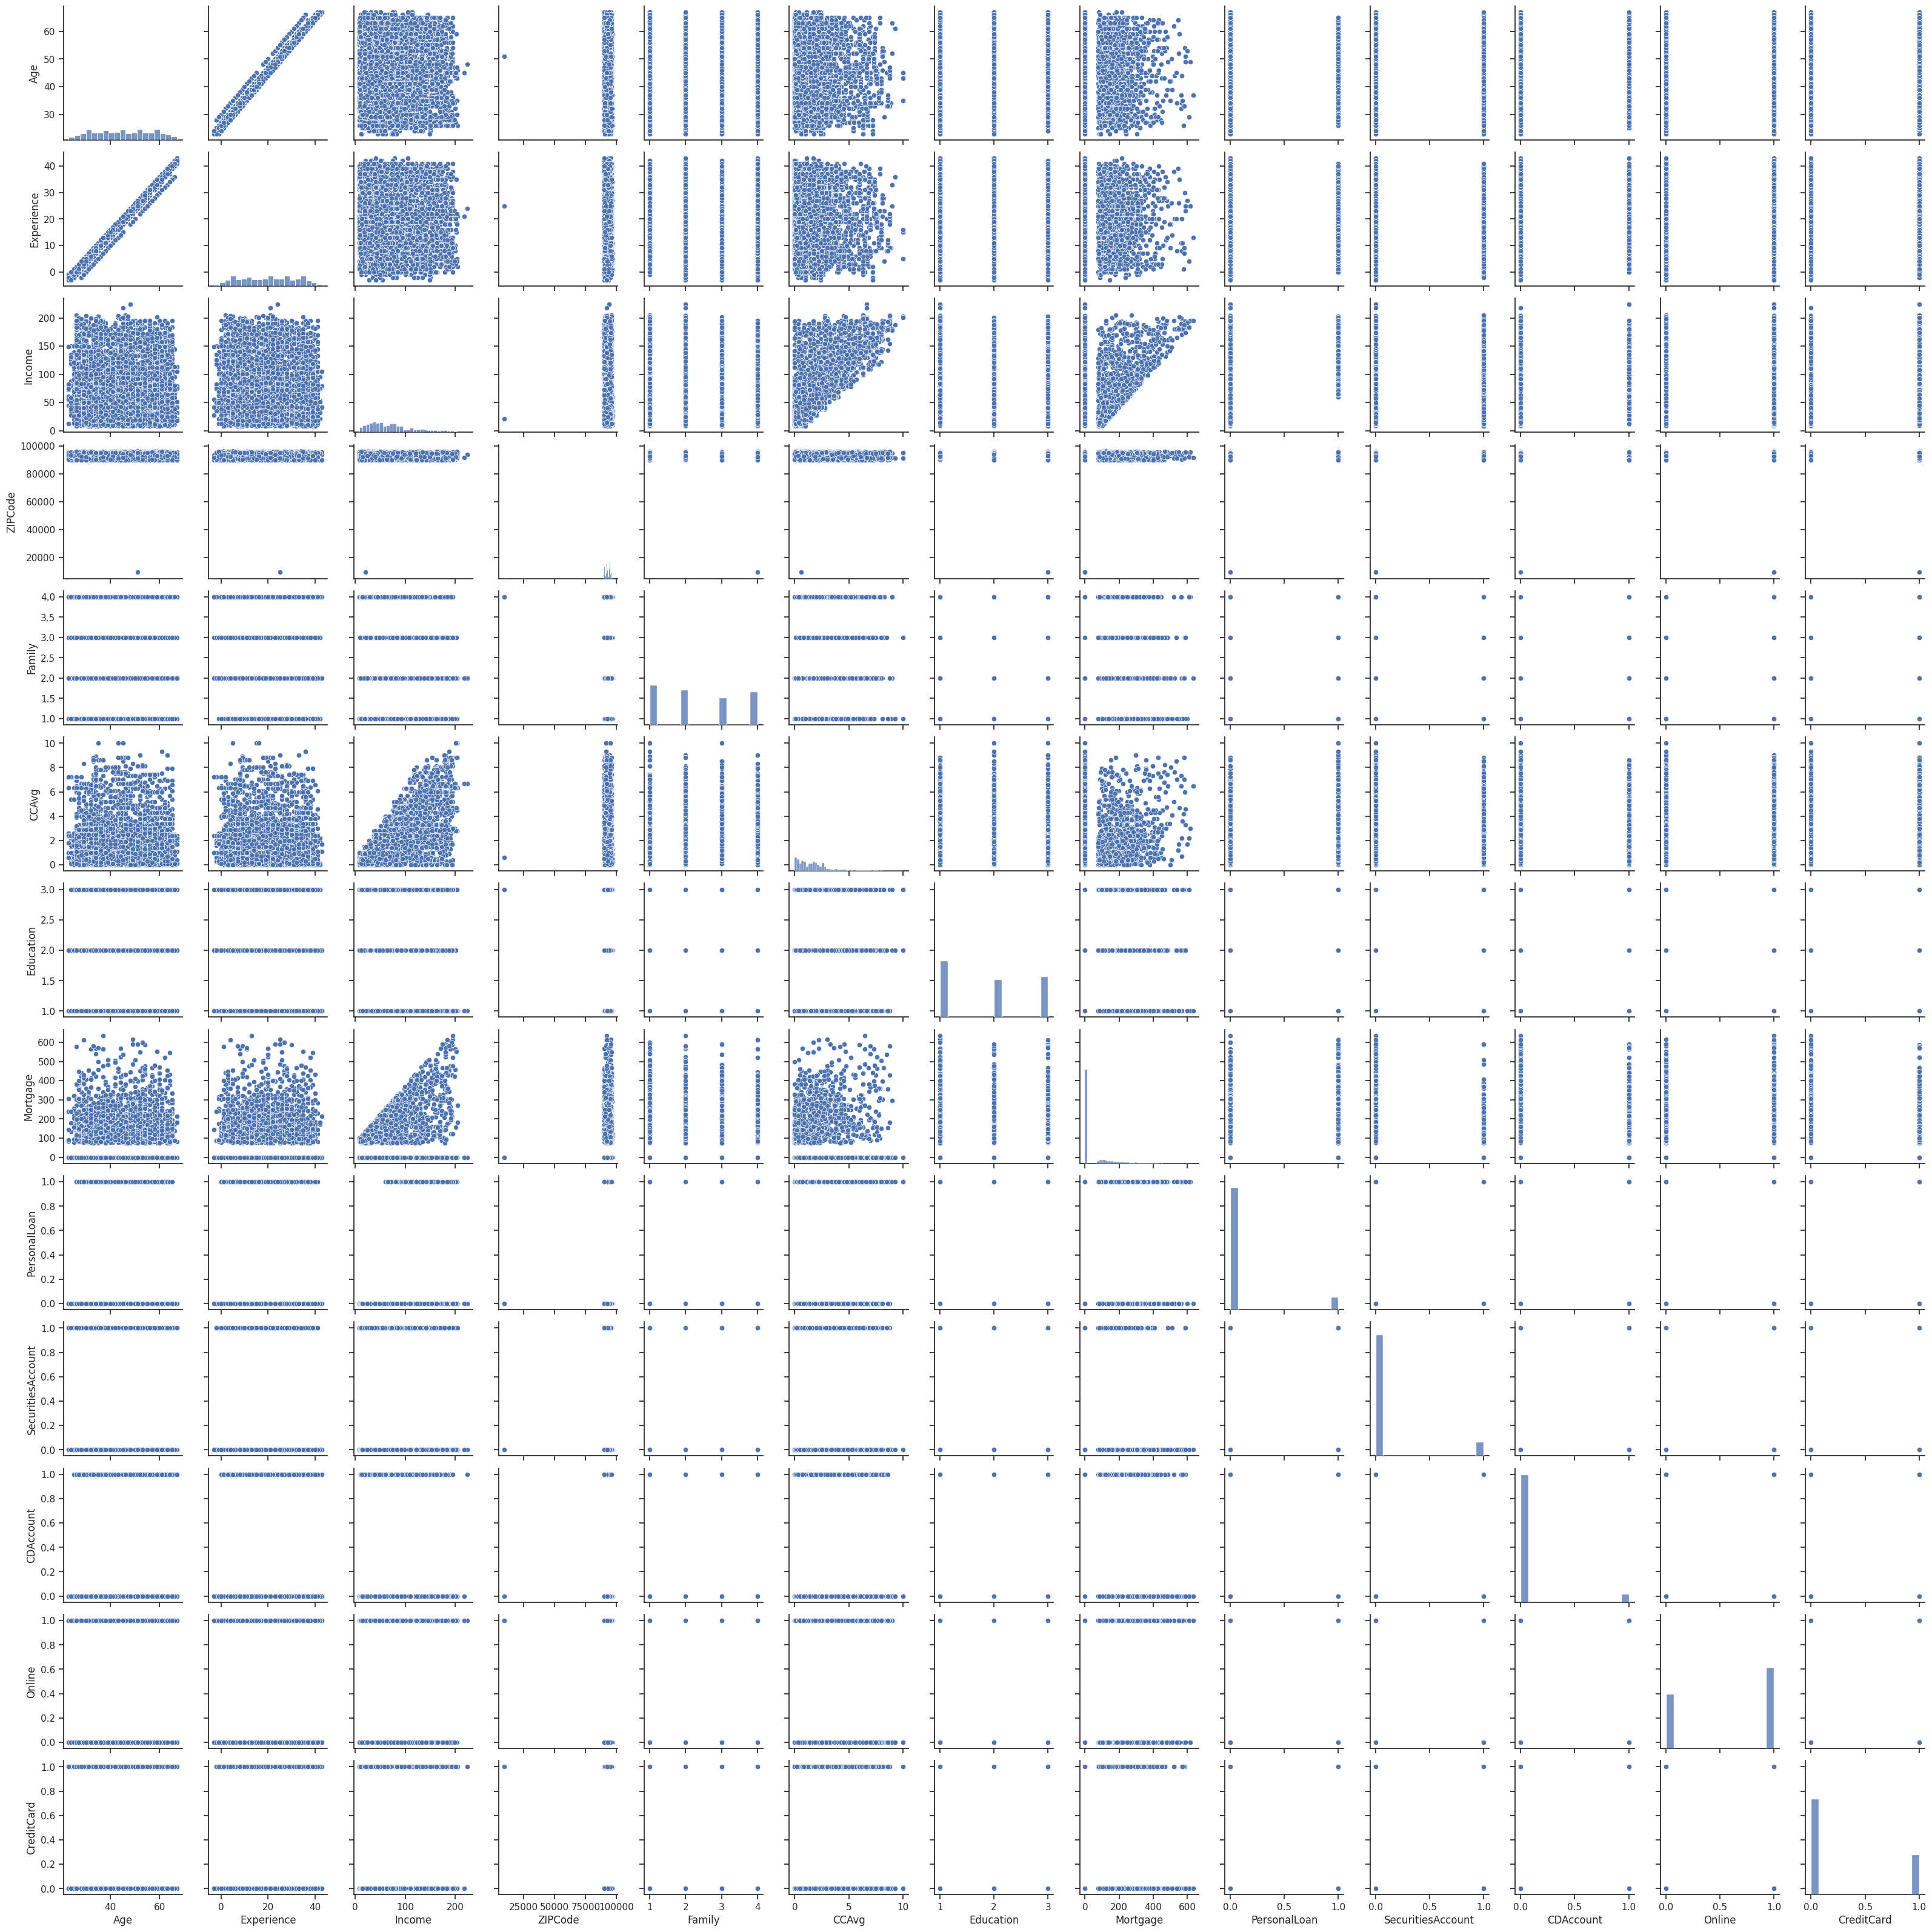

In [10]:
sns.pairplot(data.iloc[:,1:])

Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median
Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.
Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median
CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K
The variables family and education are ordinal variables. The distribution of families is evenly distributes

In [11]:
data[data['Experience'] < 0]['Experience'].count()

np.int64(52)

In [12]:
dfExp = data.loc[data['Experience'] >0]
negExp = data.Experience < 0
column_name = 'Experience'
mylist = data.loc[negExp]['ID'].tolist()

In [13]:
negExp.value_counts()

,count
Experience,
False,4948
True,52


The following code does the below steps:

For the record with the ID, get the value of Age column
For the record with the ID, get the value of Education column
Filter the records matching the above criteria from the data frame which has records with positive experience and take the median
Apply the median back to the location which had negative experienc

In [14]:
for id in mylist:
    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

In [15]:
data[data['Experience'] < 0]['Experience'].count()

np.int64(0)

In [16]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<Axes: xlabel='Education', ylabel='Income'>

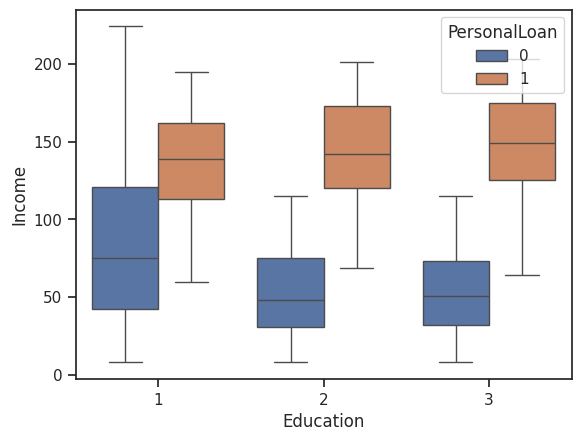

In [17]:
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=data)

/tmp/ipython-input-18-3973026467.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:yellow'` for the same effect.

  sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=data,color='yellow')


<Axes: xlabel='Education', ylabel='Mortgage'>

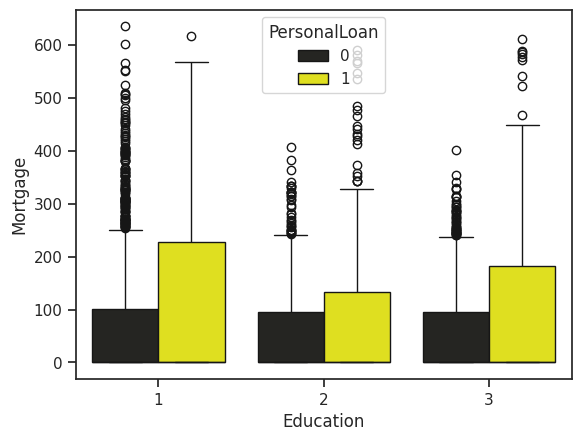

In [18]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=data,color='yellow')

<Axes: xlabel='SecuritiesAccount', ylabel='count'>

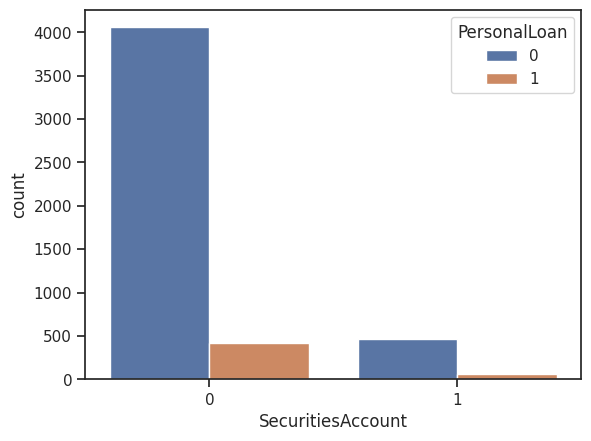

In [19]:
sns.countplot(x="SecuritiesAccount", data=data,hue="PersonalLoan")

<Axes: xlabel='Family', ylabel='count'>

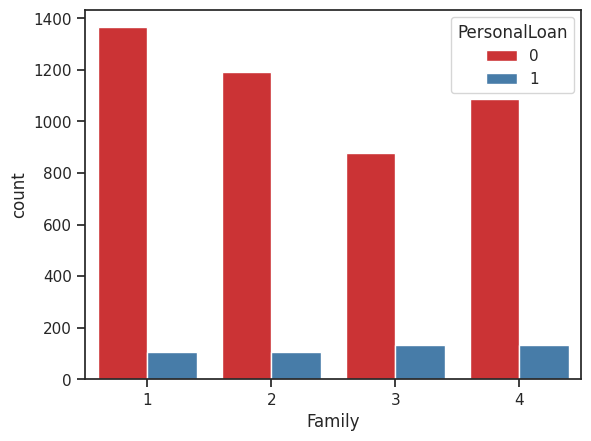

In [20]:
sns.countplot(x='Family',data=data,hue='PersonalLoan',palette='Set1')

Observation: Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

<Axes: xlabel='CDAccount', ylabel='count'>

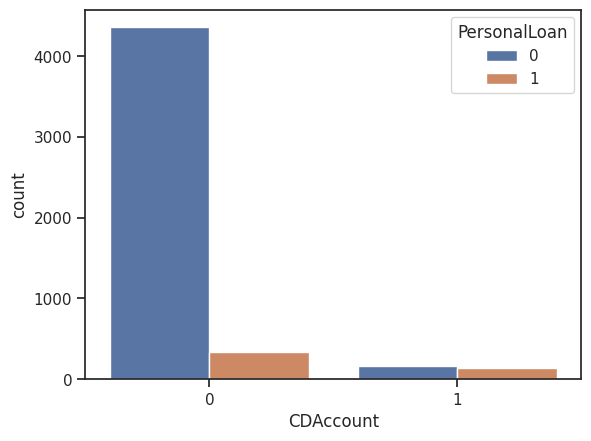

In [21]:
sns.countplot(x='CDAccount',data=data,hue='PersonalLoan')

Observation: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

/tmp/ipython-input-22-1866489800.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data[data.PersonalLoan == 0]['CCAvg'], color = 'r')
/tmp/ipython-input-22-1866489800.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data[data.PersonalLoan == 1]['CCAvg'], color = 'g')


<Axes: xlabel='CCAvg', ylabel='Density'>

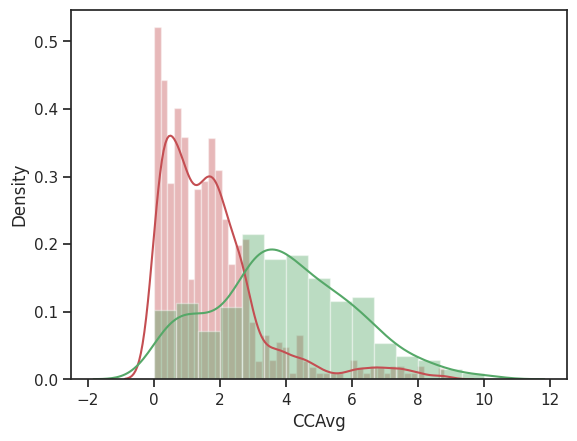

In [22]:
sns.distplot( data[data.PersonalLoan == 0]['CCAvg'], color = 'r')
sns.distplot( data[data.PersonalLoan == 1]['CCAvg'], color = 'g')

In [23]:
print('Credit card spending of Non-Loan customers: ',data[data.PersonalLoan == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', data[data.PersonalLoan == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


Observation: The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

Text(0, 0.5, 'Age')

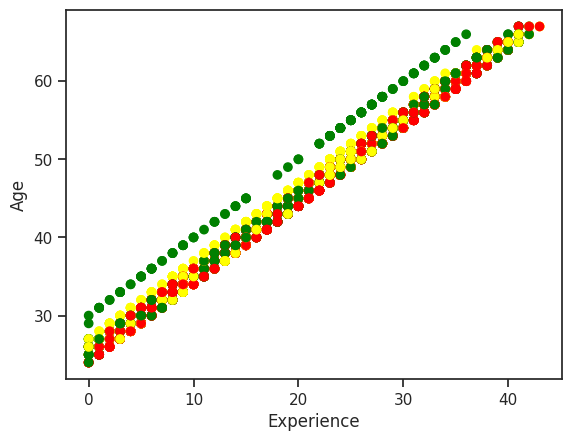

In [24]:
fig, ax = plot.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(data['Experience'],data['Age'],c=data['Education'].apply(lambda x:colors[x]))
plot.xlabel('Experience')
plot.ylabel('Age')

Observation The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level

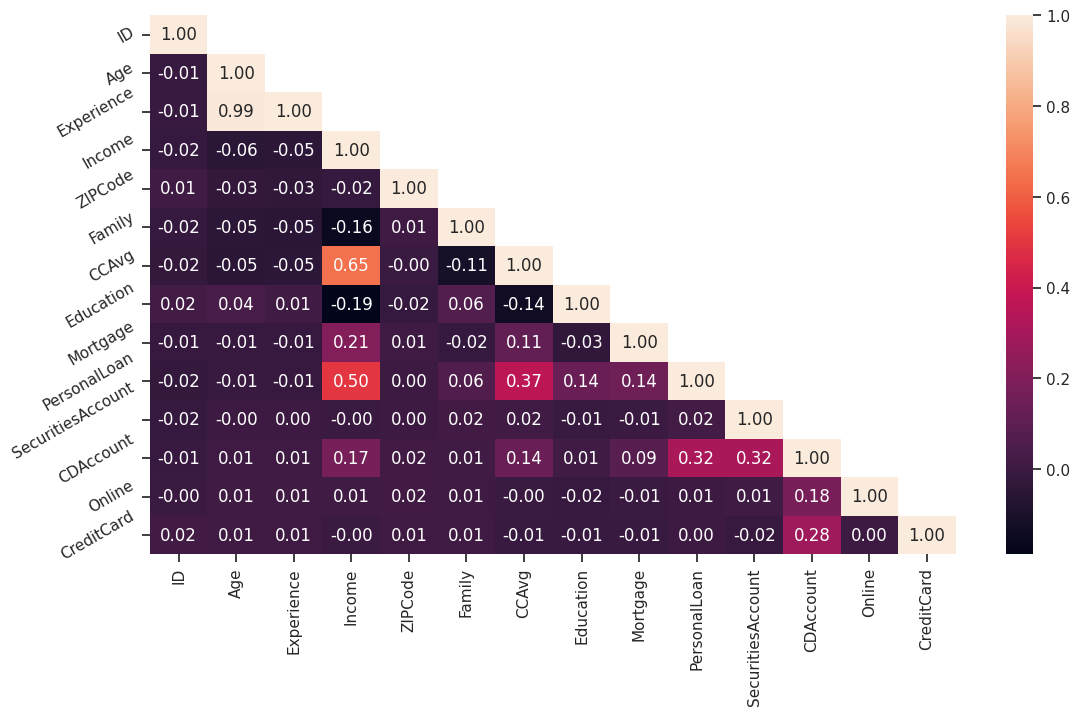

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Observation

Income and CCAvg is moderately correlated.
Age and Experience is highly correlated

<Axes: xlabel='Family', ylabel='Income'>

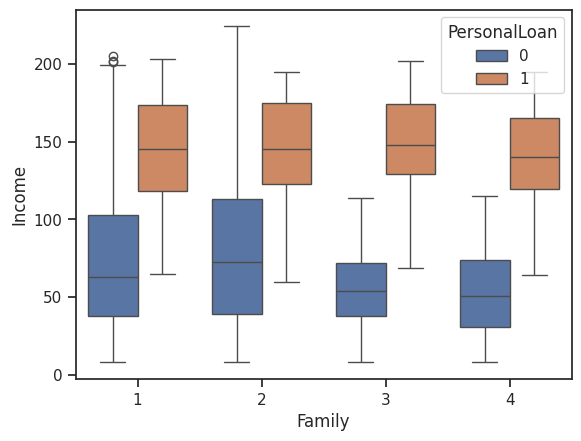

In [26]:
sns.boxplot(x=data.Family,y=data.Income,hue=data.PersonalLoan)

Applying models---
Split data into train and test

In [27]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)

In [28]:
train_labels = train_set.pop('PersonalLoan')
test_labels = test_set.pop('PersonalLoan')

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [30]:
dt_model.score(test_set , test_labels)

0.9773333333333334

In [31]:
y_predict = dt_model.predict(test_set)
y_predict[:5]

array([0, 0, 0, 0, 0])

In [32]:
test_set.head(5)

,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
789,29,31,92126,4,0.3,2,0,0,0,1,0
2507,59,60,90048,4,2.1,1,234,0,0,1,1
2376,58,23,91768,3,0.2,1,0,0,0,0,0
1378,54,34,93305,4,0.1,3,0,0,0,1,0
598,56,11,92374,2,0.2,3,90,0,0,0,0


Random Forest classifier¶

In [33]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(train_set, train_labels)

RandomForestClassifier(max_depth=2, random_state=0)

<Axes: >

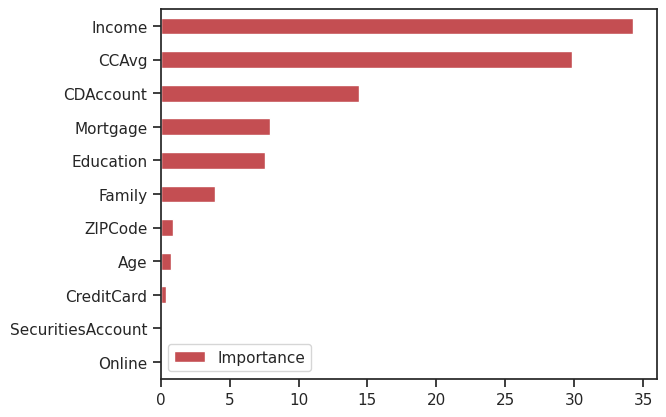

In [34]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=train_set.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

In [35]:
predicted_random=randomforest_model.predict(test_set)
randomforest_model.score(test_set,test_labels)

0.904

KNN ( K - Nearest Neighbour )

In [36]:
train_set_indep = data.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "PersonalLoan" , axis = 1)
train_set_dep = data["PersonalLoan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [37]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.9106070713809206


Model comparison

after comparing both decision tree and random forest classifier , we are on a decision that our decison tree perform better....
